In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


In [2]:
# Parameters
alfa = 0.9
beta = 0.2
gamma = 0.1
lambda0 = 1
lambda1 = 5


In [3]:
def forward_simulation(N=10, T=100):
    
    c_states = [0,1,2]
    
    # T1 C is 1
    
    c_list = [2]
    
    # Generate C's
    
    for c in range(T-1):
        
        previous_c = c_list[-1]
            
        if previous_c == 2:

            c = random.choices(c_states, weights=(beta/2,beta/2,1-beta), k=1)

        elif previous_c == 1:

            c = random.choices(c_states, weights=(0,1-gamma,gamma), k=1)

        elif previous_c == 0:

            c = random.choices(c_states, weights=(1-gamma,0,gamma), k=1)
            

        c_list.append(c[0])                

    # Generate Z
    
    Zdf = pd.DataFrame()
    
    z_states = [0,1]
    
    
    for number, c_ in enumerate(c_list):
                
        if c_ == 0:
            
            z = random.choices(z_states, weights=(alfa, 1-alfa), k=N)
                        
        elif c_ == 1:
            
            z = random.choices(z_states, weights=(1-alfa, alfa), k=N)
                        
            
        elif c_ == 2:

            z = random.choices(z_states, weights=(0.5, 0.5), k=N)
        
        columnname = 't'+ str(number)
        Zdf[columnname] = z
    
    Znp = Zdf.to_numpy()
    
    
    Znp = Znp.T.copy() # row is T, Column is N
    
    
    # Generate X

    X = []
    
    for row in Znp:
        
        xs = []
        
        for obs in row:
                        
            if obs == 1:
                
                x = np.random.poisson(lam = lambda1, size = 1)

            elif obs == 0:

                x = np.random.poisson(lam = lambda0, size = 1)

            xs.append(x[0])
            
        X.append(xs)
        
        Xnp = np.array(X)
        
                    
    
    return np.array(c_list), Znp, Xnp
    
    
    
    
    
    
    

In [4]:
C, Z, X = forward_simulation()



### Visualization

In [5]:
res = np.array([sum(idx) for idx in zip(*X.T)])
res = res/10

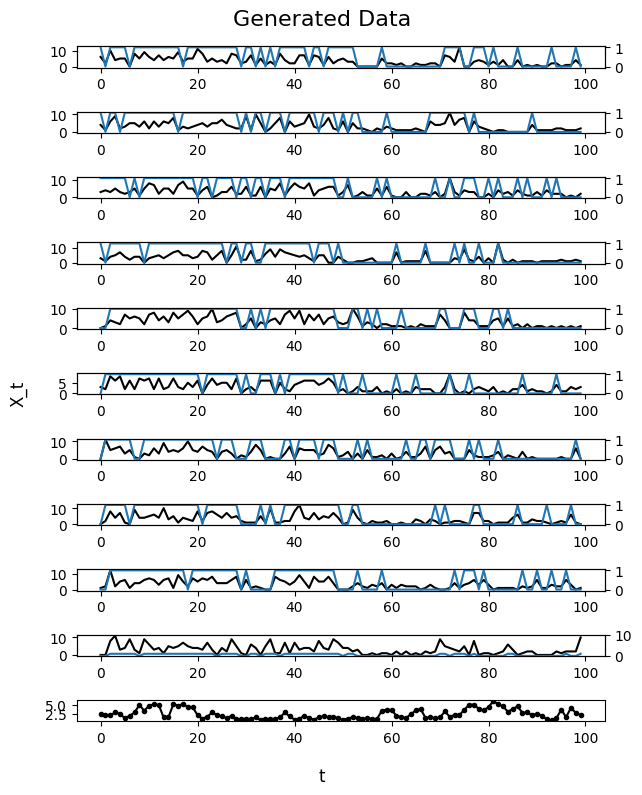

In [34]:
fig, axs = plt.subplots(11, 1, figsize= (6.5, 8))
x_plot = list(range(0,100))

for i in range(10):
    y_plot = X.T[i]
    z_plot = Z.T[i]
    axs[i].plot(x_plot, y_plot, markersize=3, color='black')
    axs[i] = axs[i].twinx()
    axs[i].plot(x_plot, z_plot)


axs[10].plot(x_plot, res, marker='o', markersize=3, color='black') # Adding a mean

plt.ylim((0,10))


fig.suptitle('Generated Data', fontsize=16)
fig.supxlabel('t')
fig.supylabel('X_t')

plt.tight_layout()
plt.show()

### linear regression

In [7]:
C, Z, X = forward_simulation(10, 100)

In [8]:
X.shape

(100, 10)

In [11]:
len(X.T)

10

In [12]:
from scipy import stats

slopes = []
for t in X.T:
    slope, intercept, r, p, std_err = stats.linregress(C,t)
    slopes.append(slope)